In [5]:
#Setup a Venv:

import sys
print(sys.version)

3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]


In [7]:
def extract_gps_speeds(file_path):
    gps_speeds = []  # List to store GPS Speed values
    try:
        with open(file_path, 'r') as file:
            for line in file:
                # Check if the line contains "GPS Speed"
                if "GPS Speed" in line:
                    # Split the line to extract the speed value
                    parts = line.strip().split(':')
                    if len(parts) == 2:
                        try:
                            # Convert the value to a float and store it
                            speed = float(parts[1].strip())
                            gps_speeds.append(speed)
                        except ValueError:
                            print(f"Could not parse GPS Speed from line: {line.strip()}")
        
        # Print all extracted GPS Speed values
        print("Extracted GPS Speeds:")
        for speed in gps_speeds:
            print(speed)
        
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Specify the path to the file
file_path = "./Data_GoPro/output-GX030390.txt"
extract_gps_speeds(file_path)


Extracted GPS Speeds:
13.204
13.14
13.179
13.2
13.163
13.18
13.242
13.16
13.238
13.24
13.393
13.24
13.538
13.39
13.633
13.54
13.654
13.63
13.657
13.66
13.817
13.66
13.911
13.82
14.018
13.91
14.094
14.02
14.154
14.1
14.232
14.15
14.267
14.23
14.44
14.27
14.58
14.44
14.674
14.58
14.742
14.68
14.784
14.74
14.747
14.79
14.775
14.75
14.825
14.78
14.889
14.83
14.906
14.89
14.971
14.91
14.953
14.97
14.927
14.95
14.864
14.93
14.826
14.87
14.903
14.83
14.909
14.9
14.86
14.91
15.02
14.86
15.188
15.02
15.284
15.19
15.321
15.29
15.368
15.32
15.467
15.37
15.555
15.47
15.562
15.56
15.575
15.56
15.638
15.58
15.7
15.64
15.824
15.7
15.854
15.82
15.869
15.85
15.98
15.87
16.053
15.98
16.128
16.05
16.14
16.13
16.172
16.14
16.298
16.17
16.319
16.3
16.377
16.32
16.45
16.38
16.438
16.45
16.524
16.44
16.572
16.52
16.638
16.57
16.67
16.64
16.73
16.67
16.74
16.73
16.887
16.74
16.915
16.89
16.891
16.91
16.942
16.89
16.917
16.94
16.958
16.92
16.962
16.96
17.082
16.96
17.23
17.08
17.268
17.23
17.266
17.27
17.505
1

In [9]:
#pip install matplotlib
import matplotlib
print(f"Matplotlib version: {matplotlib.__version__}")

Matplotlib version: 3.10.0


Extracted 9675 GPS speeds.


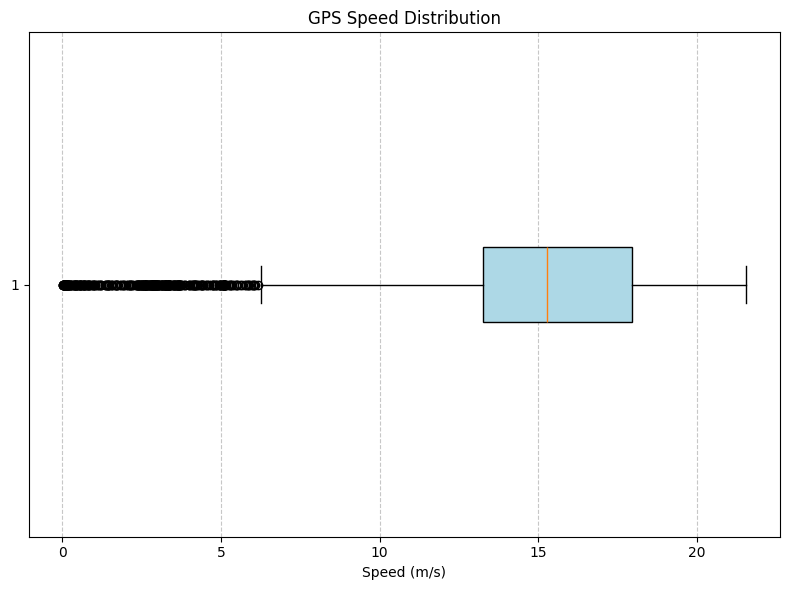

In [23]:
import re
import matplotlib.pyplot as plt

# Function to extract GPS Speed information from the file
def extract_gps_speeds(filename):
    with open(filename, 'r') as file:
        content = file.read()

    # Regular expression to find GPS Speed
    speed_pattern = r"GPS Speed\s+:\s+([\d.]+)"
    speeds = [float(match) for match in re.findall(speed_pattern, content)]
    return speeds

# Plot a boxplot of the speed distribution
def plot_speed_distribution(speeds):
    plt.figure(figsize=(8, 6))
    plt.boxplot(speeds, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.title("GPS Speed Distribution")
    plt.xlabel("Speed (m/s)")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    file_path = "./output-GX030390.txt"
    gps_speeds = extract_gps_speeds(filename)
    print(f"Extracted {len(gps_speeds)} GPS speeds.")
    plot_speed_distribution(gps_speeds)


In [14]:
9675/(8*60+53) #GPS Speed data points per second

18.151969981238274

In [ ]:
#pip install plotly

In [18]:
import pandas as pd
print(pd.__version__)


2.2.3


In [7]:
import re
import plotly.express as px
import plotly.graph_objects as go
import plotly

# Function to extract GPS Speed information from the file
def extract_gps_speeds(filename):
    with open(filename, 'r') as file:
        content = file.read()

    # Regular expression to find GPS Speed
    speed_pattern = r"GPS Speed\s+:\s+([\d.]+)"
    speeds = [float(match) for match in re.findall(speed_pattern, content)]
    return speeds

# Plot a boxplot of the speed distribution using Plotly
def plot_speed_distribution(speeds):
    fig = go.Figure()

    # Add box plot to the figure
    fig.add_trace(go.Box(
        x=speeds,
        name="GPS Speeds",
        boxpoints="all",  # Show all points
        jitter=0.3,  # Spread out the points
        pointpos=-1.8,  # Position the points
        marker=dict(color="lightblue"),
        line=dict(color="darkblue")
    ))

    # Update layout
    fig.update_layout(
        title="GPS Speed Distribution",
        xaxis_title="Speed (m/s)",
        yaxis_title="",
        xaxis=dict(showgrid=True),
        yaxis=dict(showticklabels=False),
        template="plotly_white"
    )

    fig.show()

# Main execution
if __name__ == "__main__":
    # Display the Plotly version
    print(f"Plotly version: {plotly.__version__}")

    filename = "output-GX030390.txt"
    gps_speeds = extract_gps_speeds(filename)
    print(f"Extracted {len(gps_speeds)} GPS speeds.")
    plot_speed_distribution(gps_speeds)


Plotly version: 5.24.1
Extracted 9675 GPS speeds.


In [8]:
type(gps_speeds)

list

In [9]:
import numpy as np

# Assuming gps_speeds is your list of speeds in m/s
#gps_speeds = [2.3, 5.1, 3.7, 4.0, 3.2]  # Example data

# Convert to a numpy array for easier calculations
speeds_array = np.array(gps_speeds)

# Calculate statistics in m/s
max_speed_m_s = speeds_array.max()
avg_speed_m_s = speeds_array.mean()
median_speed_m_s = np.median(speeds_array)

# Convert to km/h
max_speed_km_h = max_speed_m_s * 3.6
avg_speed_km_h = avg_speed_m_s * 3.6
median_speed_km_h = median_speed_m_s * 3.6

# Print results
print(f"Max Speed: {max_speed_m_s:.2f} m/s ({max_speed_km_h:.2f} km/h)")
print(f"Average Speed: {avg_speed_m_s:.2f} m/s ({avg_speed_km_h:.2f} km/h)")
print(f"Median Speed: {median_speed_m_s:.2f} m/s ({median_speed_km_h:.2f} km/h)")


Max Speed: 21.54 m/s (77.53 km/h)
Average Speed: 15.21 m/s (54.74 km/h)
Median Speed: 15.29 m/s (55.04 km/h)


In [ ]:
# GPS Latitude                    : 37 deg 33' 25.90" N
# GPS Longitude                   : 5 deg 55' 54.49" W
# GPS Altitude                    : 1.475 m
# GPS Speed                       : 21.484
# GPS Speed 3D                    : 21.54
# GPS Latitude                    : 37 deg 33' 25.86" N
# GPS Longitude                   : 5 deg 55' 54.50" W
# GPS Altitude                    : 1.463 m

---

In [ ]:
# sudo apt install python3-pip
# pip install folium


In [10]:
import folium

# Convert GPS points from DMS to decimal degrees
def dms_to_decimal(degrees, minutes, seconds, direction):
    decimal = degrees + (minutes / 60) + (seconds / 3600)
    if direction in ['S', 'W']:
        decimal = -decimal
    return decimal

# Point 1
lat1 = dms_to_decimal(37, 33, 25.90, 'N')
lon1 = dms_to_decimal(5, 55, 54.49, 'W')

# Point 2
lat2 = dms_to_decimal(37, 33, 25.86, 'N')
lon2 = dms_to_decimal(5, 55, 54.50, 'W')

# Create a map centered between the two points
center_lat = (lat1 + lat2) / 2
center_lon = (lon1 + lon2) / 2
map_location = folium.Map(location=[center_lat, center_lon], zoom_start=17)

# Add markers for each point
folium.Marker(
    location=[lat1, lon1],
    popup="Point 1: 37°33'25.90\"N, 5°55'54.49\"W",
    tooltip="Point 1",
).add_to(map_location)

folium.Marker(
    location=[lat2, lon2],
    popup="Point 2: 37°33'25.86\"N, 5°55'54.50\"W",
    tooltip="Point 2",
).add_to(map_location)

# Save the map to an HTML file and display it
map_location.save("gps_points_map.html")
map_location


---

In [ ]:
### Speed on point info

In [11]:
import folium

# Sample sequence of GPS coordinates and corresponding speeds (you can replace these with your actual data)
gps_data = [
    {'lat': 37 + 33 / 60 + 25.90 / 3600, 'lon': -(5 + 55 / 60 + 54.49 / 3600), 'speed': 21.484},
    {'lat': 37 + 33 / 60 + 25.86 / 3600, 'lon': -(5 + 55 / 60 + 54.50 / 3600), 'speed': 22.120},
    # Add more GPS points here...
]

# Create a map centered around the first GPS point
map_location = folium.Map(location=[gps_data[0]['lat'], gps_data[0]['lon']], zoom_start=17)

# Add a line connecting the points and add speed data to the markers
locations = []
for point in gps_data:
    lat, lon, speed = point['lat'], point['lon'], point['speed']
    
    # Add the current GPS point to the path
    locations.append([lat, lon])
    
    # Add a marker at the current GPS point with speed information as popup
    folium.Marker(
        location=[lat, lon],
        popup=f"Speed: {speed} km/h",
        tooltip=f"Speed: {speed} km/h",
    ).add_to(map_location)

# Add a PolyLine (path) to visualize the movement between points
folium.PolyLine(locations, color="blue", weight=2.5, opacity=1).add_to(map_location)

# Save the map to an HTML file and display it
map_location.save("gps_speed_map.html")
map_location


In [21]:
# import folium
# from folium import plugins
# import numpy as np

# # Sample sequence of GPS coordinates and corresponding speeds (replace with your actual data)
# gps_data = [
#     {'lat': 37 + 33 / 60 + 25.90 / 3600, 'lon': -(5 + 55 / 60 + 54.49 / 3600), 'speed': 21.484},
#     {'lat': 37 + 33 / 60 + 25.86 / 3600, 'lon': -(5 + 55 / 60 + 54.50 / 3600), 'speed': 22.120},
#     {'lat': 37 + 33 / 60 + 26.00 / 3600, 'lon': -(5 + 55 / 60 + 54.55 / 3600), 'speed': 18.240},
#     {'lat': 37 + 33 / 60 + 26.10 / 3600, 'lon': -(5 + 55 / 60 + 54.60 / 3600), 'speed': 24.500},
#     # Add more GPS points here...
# ]

# # Create a map centered around the first GPS point
# map_location = folium.Map(location=[gps_data[0]['lat'], gps_data[0]['lon']], zoom_start=17)

# # Function to map speed to color
# def speed_to_color(speed):
#     """Map speed to a color"""
#     # Define a simple color scale: blue for low speeds, red for high speeds
#     if speed < 15:
#         return 'blue'
#     elif 15 <= speed < 25:
#         return 'orange'
#     else:
#         return 'red'

# # Add a line connecting the points and color-code it based on speed
# locations = []
# for i, point in enumerate(gps_data):
#     lat, lon, speed = point['lat'], point['lon'], point['speed']
    
#     # Add the current GPS point to the path
#     locations.append([lat, lon])
    
#     # Color code the marker based on speed
#     marker_color = speed_to_color(speed)
    
#     # Add a marker at the current GPS point with speed information as popup
#     folium.Marker(
#         location=[lat, lon],
#         popup=f"Speed: {speed} km/h",
#         tooltip=f"Speed: {speed} km/h",
#         icon=folium.Icon(color=marker_color)
#     ).add_to(map_location)

# # Add a PolyLine (path) with color coding based on speed
# path_colors = [speed_to_color(point['speed']) for point in gps_data]
# for i in range(1, len(gps_data)):
#     folium.PolyLine(
#         locations=[locations[i-1], locations[i]],
#         color=path_colors[i],  # Color for each segment based on speed
#         weight=3,
#         opacity=1
#     ).add_to(map_location)

# # Save the map to an HTML file and display it
# map_location.save("gps_speed_map_colored.html")
# map_location


---

In [15]:
import folium
import re
from IPython.display import IFrame

# Function to convert DMS (Degrees, Minutes, Seconds) to Decimal Degrees
def dms_to_decimal(dms):
    # Clean the input to remove unwanted characters (deg, ', ", etc.)
    cleaned_dms = re.sub(r"[^\d\.]", " ", dms).strip()  # Remove non-numeric characters, leaving spaces between numbers
    parts = cleaned_dms.split()  # Split the cleaned string into its components

    if len(parts) == 3:  # Ensure there are exactly 3 components: degrees, minutes, and seconds
        degrees, minutes, seconds = map(float, parts)
        decimal = degrees + (minutes / 60) + (seconds / 3600)
        return decimal
    else:
        raise ValueError(f"Invalid DMS format: {dms}")

# Function to map speed to color
def speed_to_color(speed):
    """Map speed to a color"""
    if speed < 15:
        return 'blue'
    elif 15 <= speed < 25:
        return 'orange'
    else:
        return 'red'

def parse_gps_coordinates(file_path, num_coordinates=50):
    # Open the file and read the contents
    with open(file_path, 'r') as file:
        exif_data = file.read()

    # Define the regex pattern to extract GPS Latitude, Longitude, and Speed
    gps_pattern = re.compile(
        r'GPS Latitude\s*:\s*(?P<latitude>[\d\s\w\'.]+).*?GPS Longitude\s*:\s*(?P<longitude>[\d\s\w\'.]+).*?GPS Speed\s*:\s*(?P<speed>\d+\.\d+)',
        re.DOTALL
    )

    # Find all matches for the pattern
    matches = gps_pattern.findall(exif_data)

    # Return the first 'num_coordinates' GPS pairs
    return matches[:num_coordinates]

# Specify the file path to the ExifTool output
file_path = 'output-GX030390.txt'  # Replace with the correct path to your ExifTool output file

# Parse the first 100 GPS Latitude, Longitude, and Speed pairs
gps_coordinates = parse_gps_coordinates(file_path)

# Create a map centered at the first coordinate (if available)
if gps_coordinates:
    try:
        # Convert the latitude and longitude from DMS to decimal degrees and store speeds
        gps_coordinates_decimal = [
            (dms_to_decimal(latitude), dms_to_decimal(longitude), float(speed)) 
            for latitude, longitude, speed in gps_coordinates
        ]
        
        # Extract the latitude and longitude for the first coordinate
        latitude, longitude = gps_coordinates_decimal[0][0], gps_coordinates_decimal[0][1]
        
        # Create a folium map centered on the first GPS point
        folium_map = folium.Map(location=[latitude, longitude], zoom_start=12)

        # Add a marker for each of the first 100 GPS coordinates with speed-based color
        locations = []
        for idx, (latitude, longitude, speed) in enumerate(gps_coordinates_decimal, start=1):
            marker_color = speed_to_color(speed)
            folium.Marker([latitude, longitude], popup=f'Point {idx} - Speed: {speed} km/h', 
                          tooltip=f'Speed: {speed} km/h', icon=folium.Icon(color=marker_color)).add_to(folium_map)
            locations.append([latitude, longitude, marker_color])
        
        # Add a PolyLine (path) with color coding based on speed
        for i in range(1, len(gps_coordinates_decimal)):
            folium.PolyLine(
                locations=[locations[i-1][:2], locations[i][:2]],  # Only latitude and longitude
                color=locations[i][2],  # Color for each segment based on speed
                weight=3,
                opacity=1
            ).add_to(folium_map)

        # Save the map to an HTML file
        map_html_path = 'gps_coordinates_map_colored.html'
        folium_map.save(map_html_path)
        
        # Display the map inline within the notebook
        IFrame(map_html_path, width=800, height=600)
    except ValueError as e:
        print(f"Error in converting DMS to decimal: {e}")
else:
    print("No GPS coordinates found.")


In [18]:
# folium_map

---

In [ ]:
## ACELERATION

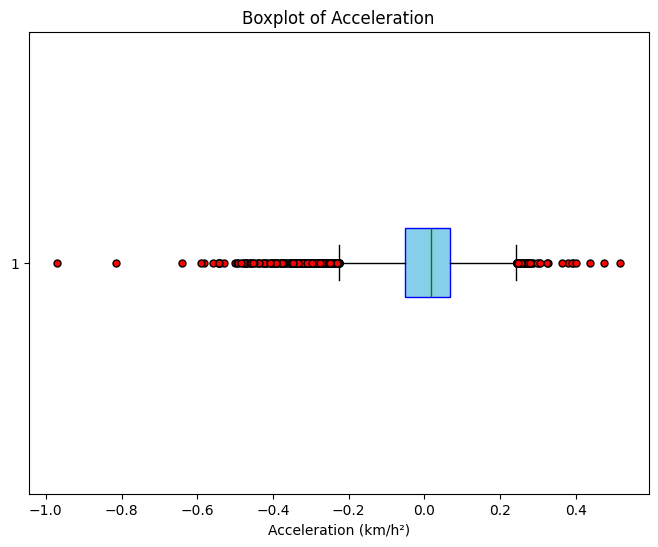

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample list of speeds (in km/h or m/s depending on your units)
# For this example, let's assume speeds are in km/h
# speeds = [
#     21.484, 21.54, 22.0, 23.1, 23.5, 24.0, 25.2, 26.1, 26.7, 27.3,
#     28.0, 28.5, 29.2, 30.0, 30.5, 31.2, 32.0, 32.5, 33.0, 33.5, 34.0
# ]

speeds = gps_speeds

# Calculate the acceleration: difference in speed between consecutive points
acceleration = np.diff(speeds)

# Plot a boxplot of the acceleration values
plt.figure(figsize=(8, 6))
plt.boxplot(acceleration, vert=False, patch_artist=True, 
            boxprops=dict(facecolor="skyblue", color="blue"),
            flierprops=dict(markerfacecolor="red", marker="o", markersize=5),
            medianprops=dict(color="green"))

plt.title("Boxplot of Acceleration")
plt.xlabel("Acceleration (m/s²)")  # Adjust units accordingly (e.g., km/h² or m/s²)
plt.show()


In [25]:
import numpy as np
import plotly.graph_objects as go

# Sample list of speeds (in km/h or m/s depending on your units)
# For this example, let's assume speeds are in km/h
# speeds = [
#     21.484, 21.54, 22.0, 23.1, 23.5, 24.0, 25.2, 26.1, 26.7, 27.3,
#     28.0, 28.5, 29.2, 30.0, 30.5, 31.2, 32.0, 32.5, 33.0, 33.5, 34.0
# ]
speeds = gps_speeds

# Calculate the acceleration: difference in speed between consecutive points
acceleration = np.diff(speeds)

# Create a boxplot of the acceleration values using Plotly
fig = go.Figure()

fig.add_trace(go.Box(
    y=acceleration,
    boxmean='sd',  # Shows the mean with standard deviation (you can change this to 'all' if you want all statistics)
    name='Acceleration (m/s²)',
    marker_color='skyblue',
    line_color='blue',
    boxpoints='all',  # Show all data points (can be 'outliers' or 'all')
    jitter=0.05,  # Controls the amount of jitter in the points
    pointpos=0,  # Position of points (0 means centered, negative values move them to the left)
))

# Update layout for better styling
fig.update_layout(
    title="Boxplot of Acceleration",
    xaxis_title="Acceleration (m/s²)",
    yaxis_title="Acceleration (m/s²)",  # Update according to your units
    template="plotly_dark",  # Optional: Choose a style
    showlegend=False  # Optional: Hide the legend since we have one trace
)

fig.show()


In [26]:
import numpy as np

# Assuming gps_speeds is a list of speed values in m/s
# Example gps_speeds list (replace this with your actual data)
#gps_speeds = [15, 16, 17, 16.5, 14.2, 18.7, 20, 19.5, 18, 17.2]

# Calculate the differences between consecutive speeds
speed_diffs = np.diff(gps_speeds)

# Find the index where the maximum speed gap occurs
max_gap_index = np.argmax(speed_diffs)

# The maximum gap is between gps_speeds[max_gap_index] and gps_speeds[max_gap_index + 1]
max_gap_value = speed_diffs[max_gap_index]
speed_before_gap = gps_speeds[max_gap_index]
speed_after_gap = gps_speeds[max_gap_index + 1]

# Print the results
print(f"Maximum speed gap of {max_gap_value} m/s occurs between {speed_before_gap} m/s and {speed_after_gap} m/s at index {max_gap_index}.")


Maximum speed gap of 0.5180000000000007 m/s occurs between 11.644 m/s and 12.162 m/s at index 2332.


In [28]:
# P = Fv
# P = mav

### We are not that heavy though...

# Given values
horsepower = 15  # in cv
max_gap_value = 0.518  # max acceleration in m/s²
v1 = 11.644  # speed 1 in m/s
v2 = 12.162  # speed 2 in m/s

# Convert horsepower (cv) to watts (1 cv = 735.5 watts)
power_watts = horsepower * 735.5

# Calculate average speed
average_speed = (v1 + v2) / 2

# Calculate the force using F = P / v
force = power_watts / average_speed

# Calculate the mass using m = F / a
mass_kg = force / max_gap_value

print(f"Force: {force} N")
print(f"Calculated mass: {mass_kg} kg")


Force: 617.9114508947324 N
Calculated mass: 1192.8792488315298 kg
